<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli. Adapted for CECS APML and PR by Arash Sarshar. Shared under the same licenses.</td>
 <td> </td>
</table>

# Feedforward Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [3]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [4]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
batch_size = 40
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(np.ceil(num_epochs))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [6]:
# x, y = next(iter(train_loader))

In [7]:
for i,d in enumerate(train_loader):
    x, y = d
    break

In [8]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break
# Images = 40
# Dimensions = 1 * 28 * 28

torch.Size([40, 1, 28, 28]) torch.Size([40])


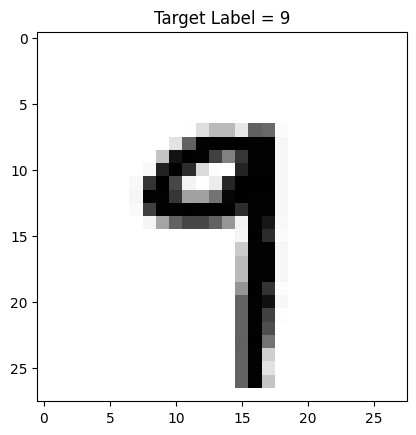

In [9]:
idx = 2
plt.imshow(x[idx,0,:,:], cmap='Greys') # x[idx, 0, rows, col]
plt.title('Target Label = {}'.format(y[idx].numpy()));

In [10]:
class Perceptron(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()

        # Non-linearity
        self.activation = nn.Sigmoid()
        
        self.layer1 = nn.Linear(input_dim, output_dim, ) 
        
    
    def forward(self, x):
        out  = self.activation(self.layer1(x))
        return out

In [11]:
class FFNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNN, self).__init__()

        # Non-linearity
        self.activation = nn.Sigmoid()
        
        # Input Layer 
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        
        # Hidden Layer 
        self.fc2 = nn.Linear(hidden_dim, hidden_dim) 

        # Output Layer 
        self.fc3 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h1  = self.activation(self.fc1(x))
        h2  = self.activation(self.fc2(h1))
        out = self.activation(self.fc3(h2))
        return out

In [12]:
model = FFNN(28*28, 50, 10)

In [13]:
model = Perceptron(28*28, 10 ) # input dim = 784 for flatten matrix, output dim = 10 for numbers 0-9

In [14]:
model

Perceptron(
  (activation): Sigmoid()
  (layer1): Linear(in_features=784, out_features=10, bias=True)
)

In [15]:
ex = x[0,0,:,:]
ex= ex.reshape(1,28*28)

In [16]:
model(ex)

tensor([[0.6008, 0.3543, 0.4537, 0.5023, 0.5328, 0.5100, 0.5075, 0.4394, 0.5498,
         0.4499]], grad_fn=<SigmoidBackward0>)

In [17]:
[print(p.shape) for p in model.parameters()]

torch.Size([10, 784])
torch.Size([10])


[None, None]

In [18]:
print("Params:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Params: 7850


In [19]:
loss_function = nn.CrossEntropyLoss()

In [20]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  

In [21]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()
        # print("image shape:", images.shape)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        prediction = model(images) # [40, 10] for 40 batch size, 10 numbers
        # print("prediction shape:", prediction.shape)
        # print("labels shape:", labels.shape)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = loss_function(prediction, labels) # labels = 40 for the 40 labels / batch size
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        # Every 500 iterations
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images with gradient accumulation capabilities
                images = images.view(-1, 28*28).requires_grad_()
                
                # Forward pass only to get logits/output
                outputs = model(images)
                
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                
                # Total number of labels
                total += labels.size(0)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / total
            
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.607931137084961. Accuracy: 90.41999816894531
Iteration: 1000. Loss: 1.6030066013336182. Accuracy: 90.37000274658203
Iteration: 1500. Loss: 1.5358362197875977. Accuracy: 91.05999755859375
Iteration: 2000. Loss: 1.5140807628631592. Accuracy: 91.30999755859375
Iteration: 2500. Loss: 1.5095309019088745. Accuracy: 91.37000274658203
Iteration: 3000. Loss: 1.5171005725860596. Accuracy: 90.88999938964844


In [22]:
print(prediction.shape)
print(labels.shape)
print(loss)

test = 2 + torch.tensor(range(10))
print(test)
print(torch.max(test))

what, where = torch.max(test, 0)
print(what)
print(where)

torch.Size([40, 10])
torch.Size([40])
tensor(1.5171, grad_fn=<NllLossBackward0>)
tensor([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor(11)
tensor(11)
tensor(9)


In [23]:
_, predicted = torch.max(outputs.data, 1)
error        = predicted - labels


In [24]:
idx_error = error.nonzero()[1,:].detach().item()
idx_error

15

In [25]:
print((np.array([1, 2, 3]) == np.array([0, 2, 3])))
np.sum((np.array([1, 2, 3]) == np.array([0, 2, 3])))

[False  True  True]


2

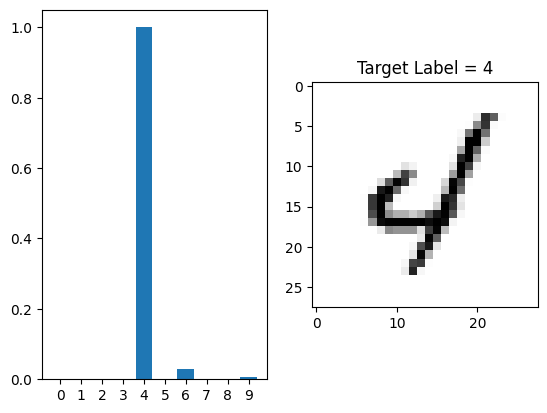

In [26]:
idx = 14
ax = plt.subplot(121)
ax.bar(range(10), outputs[idx,:].detach().numpy())
ax.set_xticks(range(10))
image = images.view(-1, 28,28).detach().numpy()
plt.subplot(122)
plt.imshow(image[idx,:,:], cmap='Greys')
plt.title('Target Label = {}'.format(labels[idx].detach().numpy()));

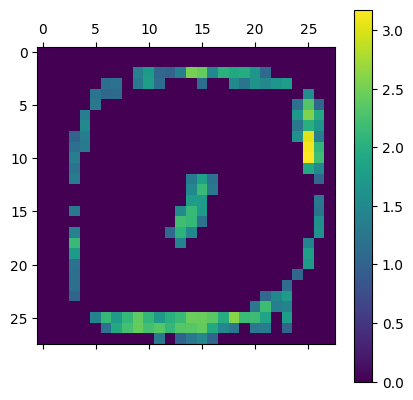

In [27]:
params = list(model.parameters())
W = params[0].detach().numpy()
W = np.abs(W[0,:]) # W[row, col]
W[W< 1] = 0 # Weights
W = W.reshape(28,28)
plt.matshow(W)
plt.colorbar()

https://x.com/BenThePearman/status/1707248821225631972?s=20

In [28]:
params

[Parameter containing:
 tensor([[ 0.0065, -0.0333, -0.0143,  ..., -0.0214,  0.0188,  0.0260],
         [-0.0012, -0.0282,  0.0199,  ...,  0.0164,  0.0264,  0.0161],
         [ 0.0116, -0.0079,  0.0094,  ...,  0.0171,  0.0192, -0.0003],
         ...,
         [ 0.0281,  0.0059, -0.0342,  ...,  0.0318,  0.0199, -0.0352],
         [-0.0323,  0.0225, -0.0200,  ...,  0.0190,  0.0074, -0.0063],
         [-0.0001, -0.0137,  0.0176,  ...,  0.0141, -0.0216, -0.0023]],
        requires_grad=True),
 Parameter containing:
 tensor([-1.3979,  0.1038, -1.0349, -1.6457, -0.1343,  1.2970, -1.2559,  0.3080,
         -4.2414, -1.6567], requires_grad=True)]

In [29]:
new_image  = image[idx,:,:]
new_image  = torch.tensor(new_image + 0.3*np.random.rand(*new_image.shape), dtype=torch.float)
new_output = model(new_image.flatten())

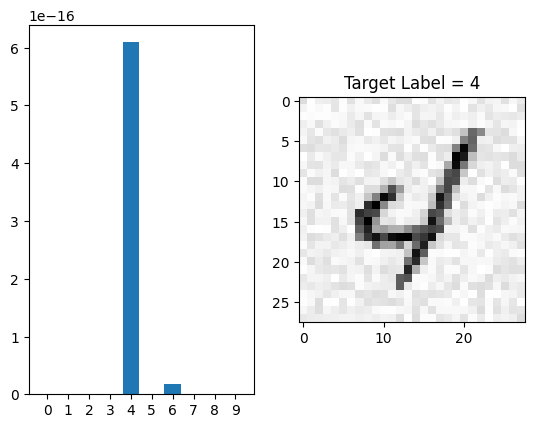

In [30]:
ax = plt.subplot(121)
ax.bar(range(10),new_output.detach().numpy())
ax.set_xticks(range(10))
new_image = new_image.reshape(28,28).detach().numpy()
plt.subplot(122)
plt.imshow(new_image, cmap='Greys')
plt.title('Target Label = {}'.format(labels[idx].detach().numpy()));